In [1]:
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
from keras.utils.np_utils import to_categorical

Using Theano backend.


In [2]:
# prepare dataset
irisdata = load_iris()
X,Y = irisdata["data"], irisdata["target"]
train_X, test_X, train_Y, test_Y = train_test_split( X, Y, test_size=0.2, random_state=123 )
#train_Y , test_Y = to_categorical( train_Y ), to_categorical( test_Y )

In [21]:
#print( train_X.shape, test_X.shape )
print( test_Y.shape )

(30,)


In [4]:
# 空のモデルオブジェクトを生成
from keras.models import Sequential
model = Sequential()

In [5]:
# レイヤーは.addで追加して構成する
# 活性化関数や、隠れ層の設定で結果がだいぶ変わる
# 活性化関数 relu, softmax, sigmoid, tanh
from keras.layers import Dense, Activation
# 一層目の追加と活性化関数の定義
model.add( Dense( output_dim=12, input_dim=4 ) )
model.add( Activation( "relu" ) )
model.add( Dense( output_dim=3 ) )

model.add( Activation( "softmax" ) )

In [6]:
# モデルの生成はcompileで行う。
model.compile( optimizer="sgd",
               loss="sparse_categorical_crossentropy",
               metrics = ["accuracy"] )

In [7]:
hist = model.fit( train_X, train_Y, nb_epoch=50, batch_size=5 )

Epoch 1/50
120/120 [==============================] - 0s - loss: 1.8365 - acc: 0.4333     
Epoch 2/50
120/120 [==============================] - 0s - loss: 0.8516 - acc: 0.5583     
Epoch 3/50
120/120 [==============================] - 0s - loss: 0.7377 - acc: 0.8083     
Epoch 4/50
120/120 [==============================] - 0s - loss: 0.6514 - acc: 0.8250     
Epoch 5/50
120/120 [==============================] - 0s - loss: 0.5966 - acc: 0.8500     
Epoch 6/50
120/120 [==============================] - 0s - loss: 0.5622 - acc: 0.8083     
Epoch 7/50
120/120 [==============================] - 0s - loss: 0.5233 - acc: 0.8500     
Epoch 8/50
120/120 [==============================] - 0s - loss: 0.5090 - acc: 0.8083     
Epoch 9/50
120/120 [==============================] - 0s - loss: 0.4616 - acc: 0.9000     
Epoch 10/50
120/120 [==============================] - 0s - loss: 0.4383 - acc: 0.9000     
Epoch 11/50
120/120 [==============================] - 0s - loss: 0.4199 - acc: 0.8500   

In [8]:
#　学習させたモデルで予測してみる
pred_Y = model.predict_classes( test_X )

30/30 [==============================] - 0s


In [9]:
pred_Y

array([2, 2, 2, 1, 0, 2, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 2, 0,
       2, 0, 0, 0, 2, 2, 0])

In [10]:
from sklearn.metrics import confusion_matrix, classification_report

In [11]:
confusion_matrix( test_Y, pred_Y )

array([[13,  0,  0],
       [ 0,  5,  1],
       [ 0,  0, 11]])

In [12]:
print( classification_report( test_Y, pred_Y ))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        13
          1       1.00      0.83      0.91         6
          2       0.92      1.00      0.96        11

avg / total       0.97      0.97      0.97        30



In [13]:
loss = hist.history[ "loss" ]
acc = hist.history[ "acc" ]

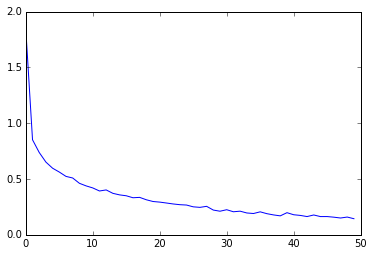

In [14]:
# 学習の過程はヒストリとして保存されているのでかしかしてみる。
import matplotlib.pyplot as plt
plt.plot( range( len( loss ) ), loss, label = "loss" )

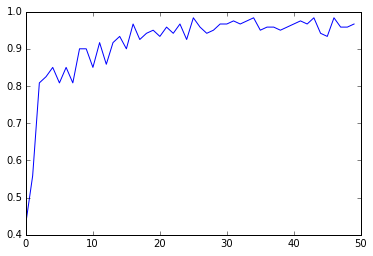

In [15]:
plt.plot( range( len( acc ) ), acc, label = "acc" )

In [16]:
# SVCはどうでしょう？
from sklearn.svm import SVC
svc = SVC()

In [17]:
svc.fit( train_X, train_Y )

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [18]:
svc_pred_Y = svc.predict( test_X )

In [19]:
confusion_matrix( test_Y, svc_pred_Y )

array([[13,  0,  0],
       [ 0,  6,  0],
       [ 0,  1, 10]])

In [20]:
# とんとんΣ(ﾟДﾟ；ｴｰｯ!
print( classification_report( test_Y, svc_pred_Y ) )

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        13
          1       0.86      1.00      0.92         6
          2       1.00      0.91      0.95        11

avg / total       0.97      0.97      0.97        30

